# Agentic AI applicatino
### To create the agentic AI we use below tools

#### Tavily search for the web serch
#### Python REPL Tool for the executing the python code
#### LLama 3.3 LLM for generating response and managing tools

In [14]:
# Import necessary libraries
import os
from dotenv import load_dotenv
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain.agents import Tool
from langchain_experimental.utilities import PythonREPL

# Load environment variables
load_dotenv()

# Get API keys
tavily_api_key = os.getenv("TAVILY_API_KEY")
groq_api_key = os.getenv("GROQ_CLOUD_API_KEY")

# Validate API keys
if not tavily_api_key:
    raise ValueError("TAVILY_API_KEY is not set. Please check your .env file.")
if not groq_api_key:
    raise ValueError("GROQ_CLOUD_API_KEY is not set. Please check your .env file.")

print("TAVILY_API_KEY:", tavily_api_key)
print("GROQ_CLOUD_API_KEY:", groq_api_key)

# Initialize Tavily Search with the API key
search = TavilySearchResults(max_results=1, api_key=tavily_api_key)


TAVILY_API_KEY: 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
GROQ_CLOUD_API_KEY: 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


In [17]:
#initialize the Tavialy search tool

search= TavilySearchResults(max_results=1, api_key=tavily_api_key)


In [26]:
#initialize the python REPL tool
python_repl = PythonREPL()

repl_tool=Tool(
    name="python_rep",
    description="Execute Python code and returns the resilt. ",
    func=python_repl.run
)

In [55]:
#intialize the gorq cloud tool

from langchain_groq import ChatGroq

llm= ChatGroq(

    model="llama-3.3-70b-versatile",
    temperature=0.7,
    max_tokens=1024,
    max_retries=2,
    api_key=groq_api_key
    
)

In [56]:
from langchain.agents import AgentExecutor, create_tool_calling_agent
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_community.tools.riza.command import ExecPython

prompt=ChatPromptTemplate.from_messages(
    [
("system","You are the hellpful assistant"),
("human","{Input}"),
MessagesPlaceholder("agent_scratchpad")
    ]
)

tools=[search,repl_tool]
agent=create_tool_calling_agent(llm,tools,prompt)
agent_executor=AgentExecutor(agent=agent,tools=tools)




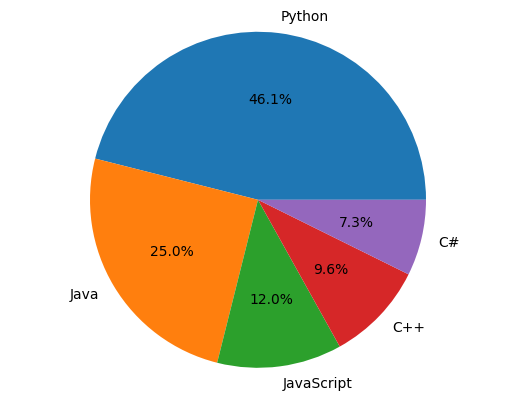

{'actions': [ToolAgentAction(tool='python_rep', tool_input="import matplotlib.pyplot as plt\nlabels = ['Python', 'Java', 'JavaScript', 'C++', 'C#']\nsizes = [31.4, 17.07, 8.18, 6.54, 4.99]\nplt.pie(sizes, labels=labels, autopct='%1.1f%%')\nplt.axis('equal')\nplt.show()", log="\nInvoking: `python_rep` with `import matplotlib.pyplot as plt\nlabels = ['Python', 'Java', 'JavaScript', 'C++', 'C#']\nsizes = [31.4, 17.07, 8.18, 6.54, 4.99]\nplt.pie(sizes, labels=labels, autopct='%1.1f%%')\nplt.axis('equal')\nplt.show()`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_zdck', 'function': {'arguments': '{"__arg1": "import matplotlib.pyplot as plt\\nlabels = [\'Python\', \'Java\', \'JavaScript\', \'C++\', \'C#\']\\nsizes = [31.4, 17.07, 8.18, 6.54, 4.99]\\nplt.pie(sizes, labels=labels, autopct=\'%1.1f%%\')\\nplt.axis(\'equal\')\\nplt.show()"}', 'name': 'python_rep'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls'}

In [57]:
for step in agent_executor.stream(

    {
        "Input":(
            "Create the pie chart of the top 5 most used programming language."
        )
    }
):
    print(step)

{'actions': [ToolAgentAction(tool='tavily_search_results_json', tool_input={'query': 'top 7 emerging technologies in Gen AI'}, log="\nInvoking: `tavily_search_results_json` with `{'query': 'top 7 emerging technologies in Gen AI'}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_yc67', 'function': {'arguments': '{"query": "top 7 emerging technologies in Gen AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}, {'index': 1, 'id': 'call_n6gf', 'function': {'arguments': '{"__arg1": "import matplotlib.pyplot as plt\\nlabels = [\'Explainable AI\', \'Edge AI\', \'Transfer Learning\', \'Reinforcement Learning\', \'Natural Language Processing\', \'Computer Vision\', \'Autonomous Systems\']\\nsizes = [15, 20, 10, 15, 20, 10, 10]\\nplt.pie(sizes, labels = labels, autopct = \'%1.1f%%\')\\nplt.title(\'Top 7 Emerging Technologies in Gen AI\')\\nplt.show()"}', 'name': 'python_rep'}, 'type': 'function'}]}, response_metadata={'fini

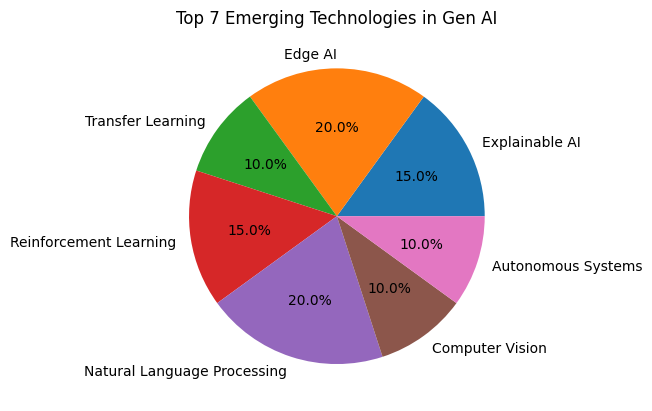

{'steps': [AgentStep(action=ToolAgentAction(tool='python_rep', tool_input="import matplotlib.pyplot as plt\nlabels = ['Explainable AI', 'Edge AI', 'Transfer Learning', 'Reinforcement Learning', 'Natural Language Processing', 'Computer Vision', 'Autonomous Systems']\nsizes = [15, 20, 10, 15, 20, 10, 10]\nplt.pie(sizes, labels = labels, autopct = '%1.1f%%')\nplt.title('Top 7 Emerging Technologies in Gen AI')\nplt.show()", log="\nInvoking: `python_rep` with `import matplotlib.pyplot as plt\nlabels = ['Explainable AI', 'Edge AI', 'Transfer Learning', 'Reinforcement Learning', 'Natural Language Processing', 'Computer Vision', 'Autonomous Systems']\nsizes = [15, 20, 10, 15, 20, 10, 10]\nplt.pie(sizes, labels = labels, autopct = '%1.1f%%')\nplt.title('Top 7 Emerging Technologies in Gen AI')\nplt.show()`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_yc67', 'function': {'arguments': '{"query": "top 7 emerging technologies in Gen AI"}'

In [59]:
for step in agent_executor.stream(

    {
        "Input":"Create the pie chart of top 7 emerning technologies in the field of Gen AI."

    }
):
    print(step)